In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
data=pd.read_csv(r'Salary_Data.csv')

<Figure size 300x300 with 0 Axes>

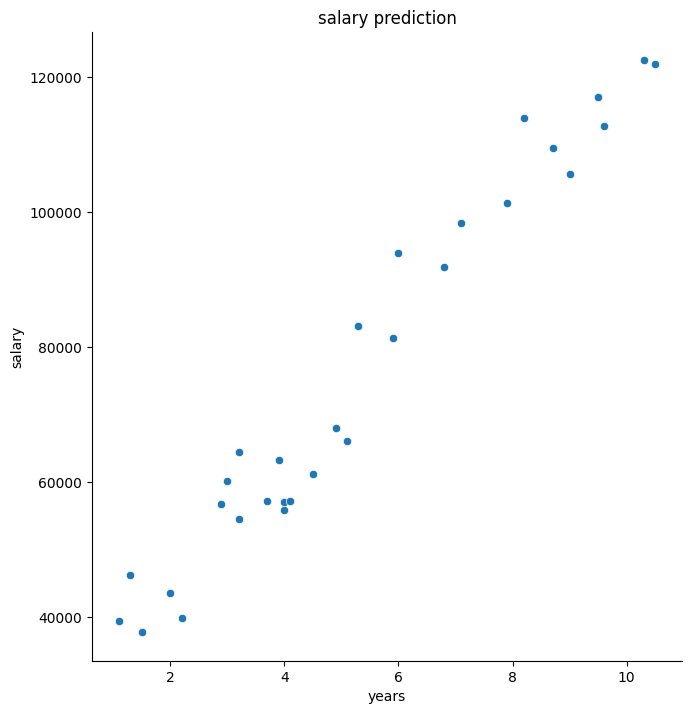

In [39]:
#%%
plt.figure(figsize=(3,3))
sns.pairplot(data,x_vars=["YearsExperience"],y_vars=["Salary"],size=7,kind="scatter")
plt.xlabel("years")
plt.ylabel("salary")
plt.title("salary prediction")
plt.show()


In [53]:
#%%
# cooking the data 
X = data.iloc[:,:-1]
y = data.iloc[:,1]

X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.8,random_state = 10)

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_poly_train=poly.fit_transform(X_train)
x_poly_test=poly.transform(X_test)

poly_model=LinearRegression()
poly_model.fit(x_poly_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
y_poly_pred_train=poly_model.predict(x_poly_train)
y_poly_pred_test=poly_model.predict(x_poly_test)

In [67]:
x_range=np.linspace(X.min(),X.max(),100).reshape(-1,1)
x_range_poly=poly.transform(x_range)
y_range_poly=poly_model.predict(x_range_poly)

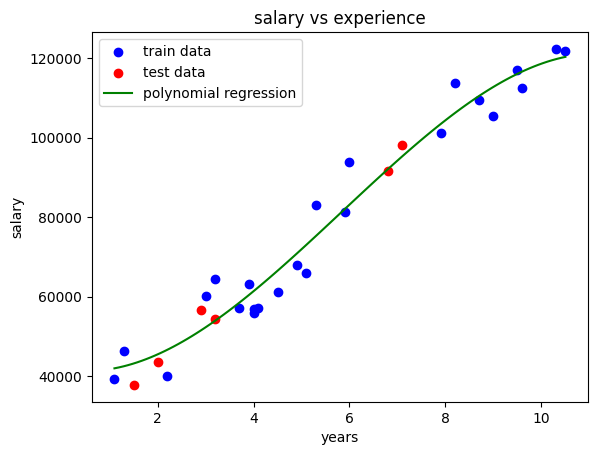

In [60]:
plt.scatter(X_train,y_train,color="blue",label="train data")
plt.scatter(X_test,y_test,color="red",label="test data")
plt.plot(x_range,y_range_poly,color="green",label="polynomial regression")
plt.title("salary vs experience")
plt.xlabel("years")
plt.ylabel("salary")
plt.legend()
plt.show()

In [77]:
mse=mean_squared_error(y_test,y_poly_pred_test)
from sklearn.metrics import root_mean_squared_error
rmse=root_mean_squared_error(y_test,y_poly_pred_test)

print("mean squared error is ",rmse)
r2=r2_score(y_test,y_poly_pred_test)# 
print("r2 score is ",r2)

mean squared error is  3386.464799296877
r2 score is  0.9784858533247924
